# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
# Проверяем NaN
print(df['Freedom'].isnull().sum())

1


In [5]:
# выбросы есть
print('Номер строки с быбросом ', df['Freedom'].loc[df['Freedom'].isnull()])

Номер строки с быбросом  28   NaN
Name: Freedom, dtype: float64


In [6]:
# Удаляем выбросы c NaN зхначениями
df = df.dropna(axis='index', how='any', subset=['Freedom'])
df['Freedom'].isnull().sum()

0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

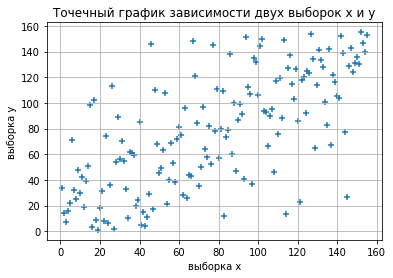

In [7]:
# построим точечный график зависимости двух переменных
y = df['Freedom']
x = df['Positive affect']

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='+')

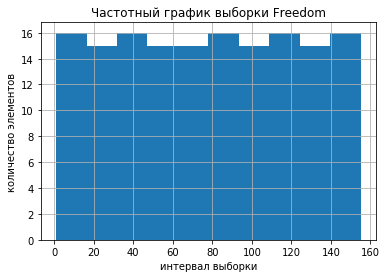

In [8]:
y = df['Freedom']
plt.hist(y,10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()

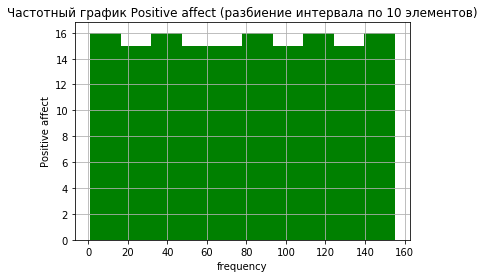

In [9]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Вывод: Оба распределения равномерные

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [10]:
# найдем медиану для df['Freedom'] 
print('Медиана - ',statistics.median(df['Freedom']))

Медиана -  78.0


In [11]:
# найдем Моду для df['Freedom']
moda = df['Freedom']
try :
    print('Мода - ',statistics.mode(moda))
except ValueError:
        print('Мода не найдена. Все значения уникальны.')


Мода не найдена. Все значения уникальны.


In [11]:
# проверяем так ли это
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
freedom_counts = {}
for p in df['Freedom']:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


Все значения встречаются по 1 разу, значит любое значение равно моде по данной формуле либо её нет.

In [12]:
# найдем мат ожидание для df['Freedom']
print('Математическое ожидание: ', statistics.mean(df['Freedom']),
' или вторым способом ', (sum(df['Freedom'])/len(df['Freedom'])))

Математическое ожидание:  78.0  или вторым способом  78.0


In [13]:
# смотрим стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom
print('смотрим стандартное отклонение ',statistics.pstdev(df['Freedom']))
print('дисперсия ',statistics.pvariance(df['Freedom']))
print('минимум ',min(df['Freedom']))
print('максимум ',max(df['Freedom']))
freedom_range = max(df['Freedom']) - min(df['Freedom'])
print('размах для Freedom ',freedom_range)

смотрим стандартное отклонение  44.74371464239419
дисперсия  2002.0
минимум  1.0
максимум  155.0
размах для Freedom  154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

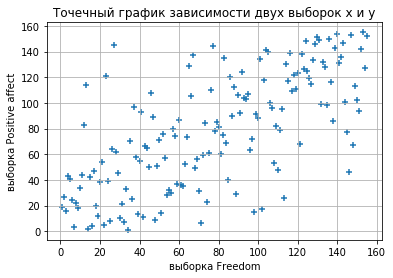

In [14]:
freedom = df['Freedom']
pos_effect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, pos_effect, marker='+')

In [15]:
# коэффициент Пирсона
from scipy.stats import pearsonr

p_pos_effect = list(pos_effect.dropna(axis='index', how='any'))
p_freedom = list(freedom.dropna(axis='index', how='any'))

corr, p_value = pearsonr(p_freedom, p_pos_effect)
print('коэффициент Пирсона равен : ', corr)

коэффициент Пирсона равен :  0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [16]:
freedom_norm = df['Freedom']
freedom_norm = freedom_norm.dropna(axis='index', how='any')
print('среднее (медиана)',statistics.mean(freedom_norm))
freedom_norm_1 = freedom_norm - statistics.mean(freedom_norm)
print('нормаль ',statistics.mean(freedom_norm_1))

среднее (медиана) 78.0
нормаль  0.0


In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm_2 = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm_2))
print(max(freedom_norm_2))

[-1.]
[1.]


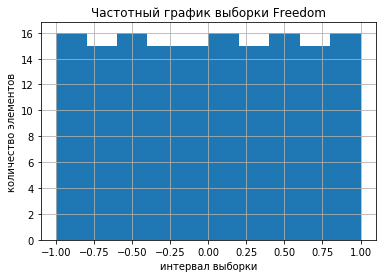

In [18]:
# смотрим на графике
y = freedom_norm_2
plt.hist(y,10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Freedom')
plt.grid(True)
plt.show()

Построить матрицу корреляций для всех колонок таблицы

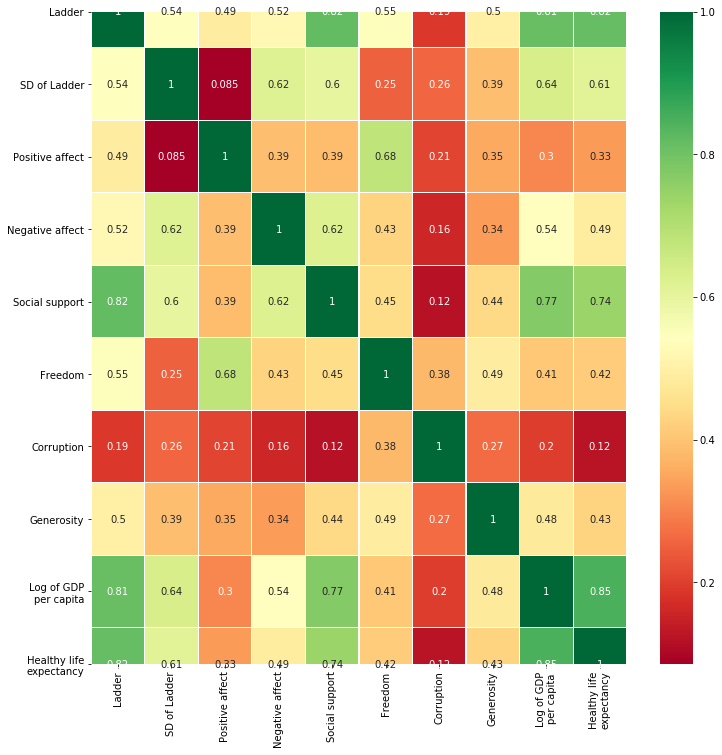

In [19]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [52]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
dfnew=pd.read_csv(url)
dfnew[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

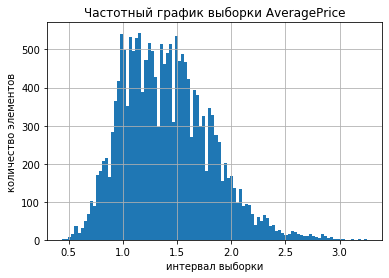

In [53]:
y = dfnew['AveragePrice']
plt.hist(y,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки AveragePrice')
plt.grid(True)
plt.show()

Ответ: AveragePrice это равномерное распределение.

Найти корреляцию в следующих колонках:

4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [54]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

Нормализуем значения и записываем в новый dataframe 

In [55]:
np_scaled = min_max_scaler.fit_transform(dfnew[['4046','4225','4770','AveragePrice']])
dfnew_norm = pd.DataFrame(np_scaled)
print(dfnew_norm[:5])

          0         1         2         3
0  0.000046  0.002660  0.000019  0.316726
1  0.000030  0.002181  0.000023  0.323843
2  0.000035  0.005332  0.000051  0.174377
3  0.000050  0.003516  0.000029  0.227758
4  0.000041  0.002142  0.000030  0.298932


Сначала поочереди посмотрим корреляции между столбцами

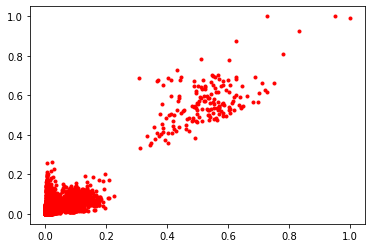

In [56]:
plt.plot(dfnew_norm[0], dfnew_norm[1], 'r.')
plt.show()

Вроде линейная корреляция есть. Посмотрим остальные.

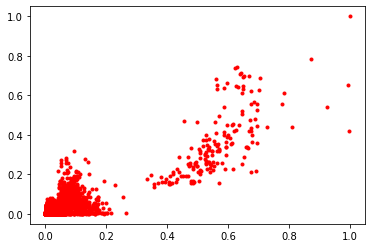

In [57]:
plt.plot(dfnew_norm[1], dfnew_norm[2], 'r.')
plt.show()

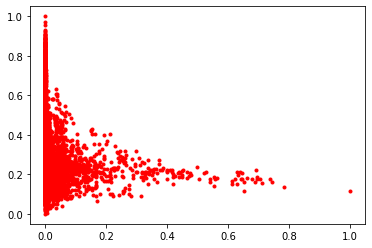

In [58]:
plt.plot(dfnew_norm[2], dfnew_norm[3], 'r.')
plt.show()

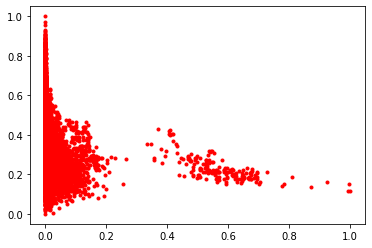

In [59]:
plt.plot(dfnew_norm[1], dfnew_norm[3], 'r.')
plt.show()

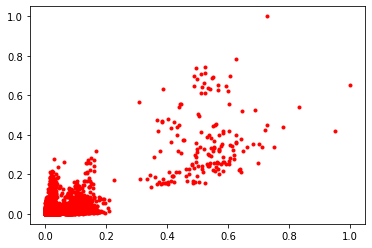

In [60]:
plt.plot(dfnew_norm[0], dfnew_norm[2], 'r.')
plt.show()

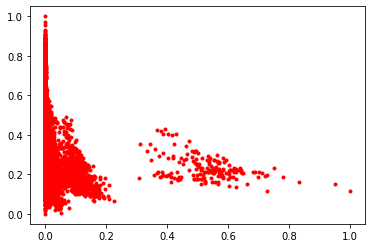

In [61]:
plt.plot(dfnew_norm[0], dfnew_norm[3], 'r.')
plt.show()

Посмотрим корреляцию на тепловой карте 

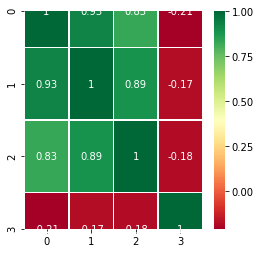

In [62]:
import seaborn as sns
sns.heatmap(dfnew_norm.corr(),annot=True,cmap='RdYlGn',linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

Из тепловой карты видно что самые корелирующие признаки это 1 и 0. Посмотрим на графике

Посчитаем коэфициент Пирсона отдельно

In [63]:
corr, p_value = pearsonr(dfnew_norm[0],dfnew_norm[1])
print(corr)

0.9261099558992295


Да коэфициент близок к 1, корреляция есть. Вывод, значит что один из параметров влияет на другой.   

...

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно. В качестве примера использовать лекционный материал в lecture_1.ipynb

In [64]:
dfnew.loc[dfnew['type']=='organic']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [65]:
PREDICTION_TYPE = 'organic'
dfnew_conv = dfnew[dfnew.type == PREDICTION_TYPE]

In [66]:
regions = dfnew_conv.groupby(dfnew_conv.region)

In [67]:
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

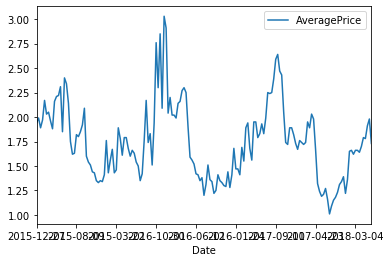

In [69]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [70]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [71]:
date_price = date_price.sort_values(by='ds')

In [73]:
date_price.head()

,ds,y
51,2015-01-04,1.50
50,2015-01-11,1.54
49,2015-01-18,1.63
48,2015-01-25,1.66
47,2015-02-01,1.60


In [106]:
train_price = date_price.loc[date_price['ds'] < '2017-07-31']

In [107]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [108]:
test_price = date_price.loc[date_price['ds'] < '2018-03-31']

In [109]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [90]:
test_price.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


Предсказать до конца марта 2018, это 244 дня

In [142]:
future = m.make_future_dataframe(periods=244)
forecast = m.predict(future)

In [143]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784347,1.221110,1.792946,1.784347,1.784347,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,0.0,0.0,0.0,1.504682
1,2015-01-11,1.783780,1.233962,1.794795,1.783780,1.783780,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,0.0,0.0,0.0,1.498502
2,2015-01-18,1.783212,1.223508,1.808975,1.783212,1.783212,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,0.0,0.0,0.0,1.505144
3,2015-01-25,1.782644,1.232504,1.804441,1.782644,1.782644,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,0.0,0.0,0.0,1.506804
4,2015-02-01,1.782077,1.215342,1.801975,1.782077,1.782077,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,0.0,0.0,0.0,1.505978


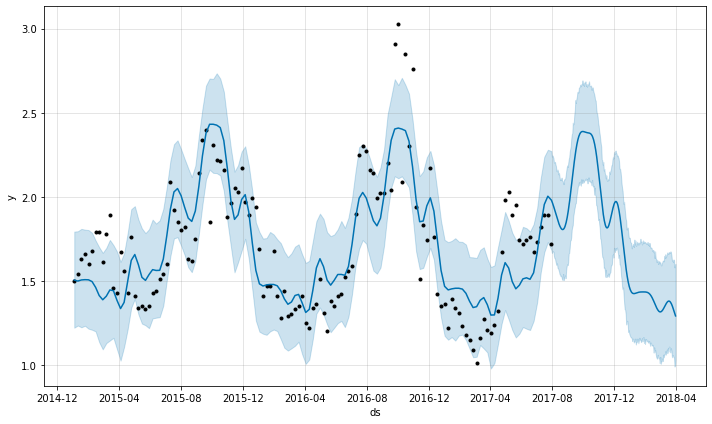

In [144]:
fig1 = m.plot(forecast)

In [131]:
test_price_ds = test_price.loc[test_price['ds'] < '2018-04-31'].loc[test_price['ds'] > '2017-07-31']

In [138]:
test_price_ds.head()

,ds,y
125,2017-08-06,1.74
124,2017-08-13,2.05
123,2017-08-20,2.43
122,2017-08-27,2.47
121,2017-09-03,2.64


In [139]:
test_price_ds.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


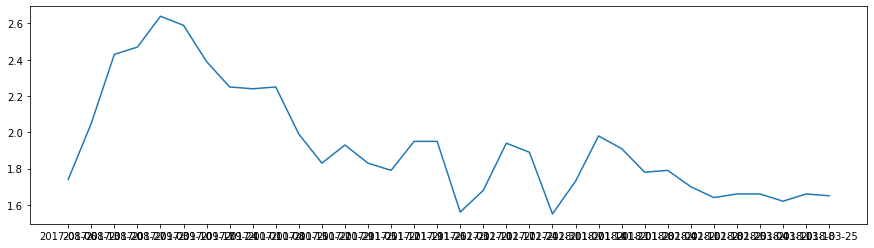

In [134]:
plt.figure(figsize=(15,4))
plt.plot(test_price_ds['ds'], test_price_ds['y'])
plt.show()

In [136]:
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135,2017-07-31,1.720431,1.695704,2.273407,1.720431,1.720431,0.251837,0.251837,0.251837,0.251837,0.251837,0.251837,0.0,0.0,0.0,1.972267
136,2017-08-01,1.720370,1.676994,2.265709,1.720370,1.720370,0.243720,0.243720,0.243720,0.243720,0.243720,0.243720,0.0,0.0,0.0,1.964091
137,2017-08-02,1.720310,1.686677,2.236837,1.720310,1.720310,0.235002,0.235002,0.235002,0.235002,0.235002,0.235002,0.0,0.0,0.0,1.955312
138,2017-08-03,1.720250,1.651201,2.216313,1.720250,1.720250,0.225781,0.225781,0.225781,0.225781,0.225781,0.225781,0.0,0.0,0.0,1.946031
139,2017-08-04,1.720190,1.636003,2.218661,1.720190,1.720190,0.216153,0.216153,0.216153,0.216153,0.216153,0.216153,0.0,0.0,0.0,1.936342


In [137]:
forecast_future.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
374,2018-03-27,1.706026,1.062235,1.620225,1.705493,1.706561,-0.376926,-0.376926,-0.376926,-0.376926,-0.376926,-0.376926,0.0,0.0,0.0,1.329100
375,2018-03-28,1.705966,1.037985,1.595032,1.705430,1.706506,-0.386524,-0.386524,-0.386524,-0.386524,-0.386524,-0.386524,0.0,0.0,0.0,1.319442
376,2018-03-29,1.705906,1.037732,1.590134,1.705366,1.706449,-0.396178,-0.396178,-0.396178,-0.396178,-0.396178,-0.396178,0.0,0.0,0.0,1.309728
377,2018-03-30,1.705846,1.027727,1.591371,1.705302,1.706389,-0.405614,-0.405614,-0.405614,-0.405614,-0.405614,-0.405614,0.0,0.0,0.0,1.300231
378,2018-03-31,1.705785,1.005372,1.566429,1.705238,1.706333,-0.414554,-0.414554,-0.414554,-0.414554,-0.414554,-0.414554,0.0,0.0,0.0,1.291231


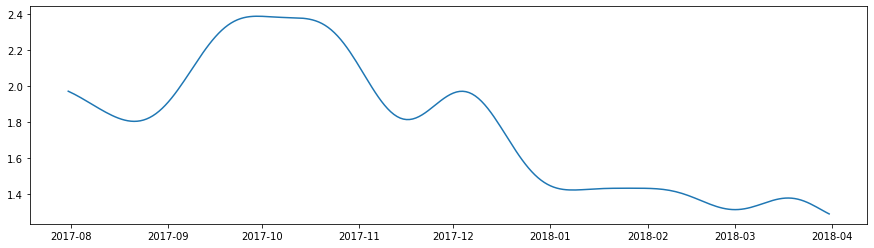

In [146]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


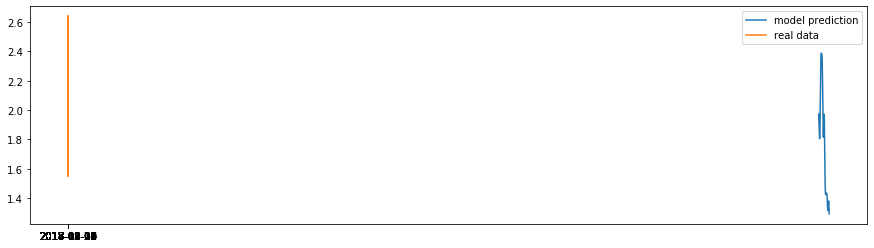

In [147]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price_ds['ds'], test_price_ds['y'])
plt.legend(['model prediction','real data'])
plt.show()

Не удается ни как показать данные на одном графике. Причём я уже обрезал данные в тестовом датафрейме, ограничил его датами которые есть в предсказании... И даты в одно периоде, всё равно на графике не рисуется